In [1]:
import sys
sys.path.append('../src/')

In [2]:
# Third-party libraries:
import numpy as np
from sklearn.datasets import load_breast_cancer
# My libraries:
import dataset.dataset as dtset
from dbclass.dbclass import DBCLASS
from dbclass import dbclass_utils as db_utils

In [3]:
# import some data to play with
ds = load_breast_cancer()
# Splitting the data for trainning and for test:
ds_train, ds_validation = dtset.split_data(ds, prop_train=0.5)
ds_validation, ds_test = dtset.split_data(ds_validation, prop_train=0.5)

0% concluído...
0% concluído...
10% concluído...
20% concluído...
30% concluído...
40% concluído...
50% concluído...
60% concluído...
70% concluído...
80% concluído...
90% concluído...


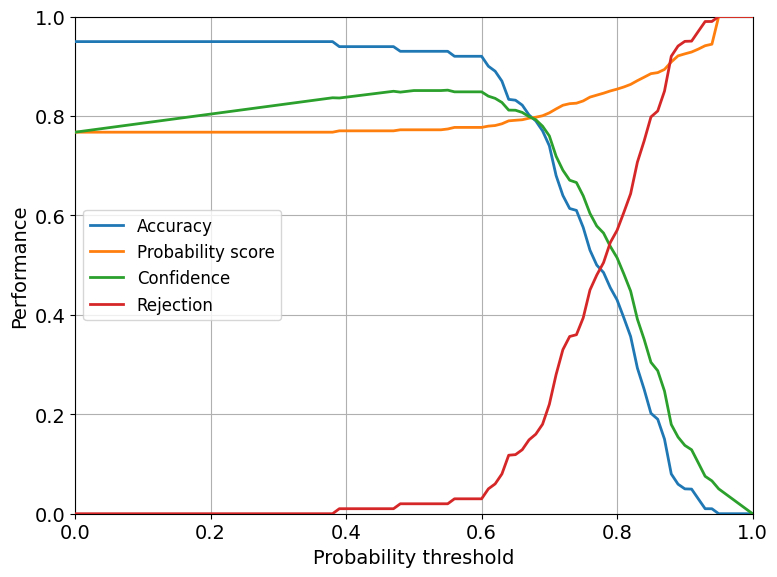


Best probability threshold value: 0.55
accuracy 0.93
prob_score 0.773749
rejection 0.02
confidence 0.851874


In [4]:
# Trainning the model using cross validation in the trainning dataset:
dbclass = DBCLASS()
prob_thold_list = np.append(np.arange(0, 1, 0.01), 0.999)
best_prob_thold, class_metrics = db_utils.cross_validation_trainning(dbclass, ds_train, ds_validation, prob_thold_list)
print("\nBest probability threshold value:", best_prob_thold)
for metric in class_metrics.keys():
    print(metric, class_metrics[metric])

              precision    recall  f1-score   support

   malignant       0.82      0.92      0.87        53
      benign       1.00      0.81      0.90        90
     Unknown       0.85      0.97      0.91        71

    accuracy                           0.89       214
   macro avg       0.89      0.90      0.89       214
weighted avg       0.91      0.89      0.89       214


Confusion matrix:


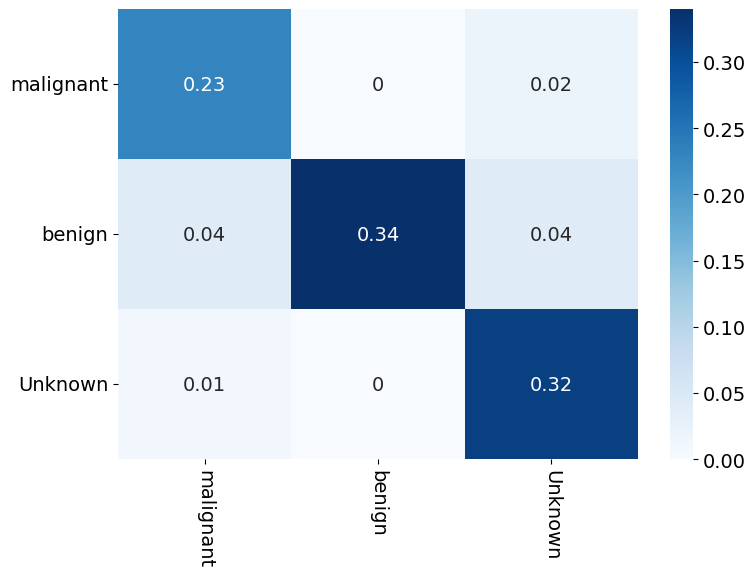


Index and Target label:
Index: 0 Label: malignant
Index: 1 Label: benign

Probability score threshold: 0.55
accuracy 0.89
prob_score 0.755184
rejection 0.38
confidence 0.822592


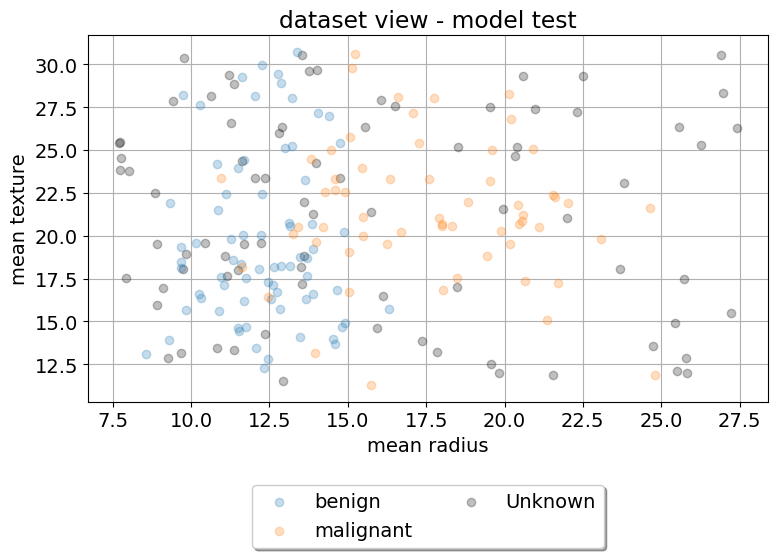

In [5]:
# Once the best probability score threshold is found, the classifier is
# configured with the best settings:
dbclass = DBCLASS(prob_thold=best_prob_thold)
ds_model = dtset.join_data((ds_train, ds_validation))
dbclass.fit(ds_model['data'], ds_model['target'], target_names=ds_model['target_names'])
ds_test = dtset.insert_rand_noclass(ds_test)
db_utils.dbclass_model_test(dbclass, ds_test)